# Estadística Descriptiva

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
import pandas as pd
import pathlib
plt.style.use('fivethirtyeight')
import os
from utils import plotUtils
import datetime as dt
import matplotlib.dates as mdates

In [11]:
fname_gas = pathlib.Path().resolve() / "data" / "FuturosGasNatural.csv"
fname_petroleo_brent = pathlib.Path().resolve() / "data" / "FuturosPetroleoBrent.csv"
fname_petroleo_wti = pathlib.Path().resolve() / "data" / "FuturosPetroleoWTI.csv"
fname_carbon = pathlib.Path().resolve() / "data" / "FuturosCarbon.csv"

# carbon https://www.investing.com/commodities/coal-cme-futures-historical-data

In [29]:
gas = pd.read_csv(fname_gas, decimal=',')
petroleo_brent = pd.read_csv(fname_petroleo_brent, decimal=',')
petroleo_wti = pd.read_csv(fname_petroleo_wti, decimal=',')
carbon = pd.read_csv(fname_carbon, decimal='.')

In [13]:
gas

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,19.05.2022,8.105,8.135,8.499,7.909,-,"-3,14%"
1,18.05.2022,8.368,8.318,8.548,8.160,"80,72K","0,77%"
2,17.05.2022,8.304,8.016,8.372,8.015,"76,67K","4,37%"
3,16.05.2022,7.956,7.700,8.183,7.663,"93,52K","3,82%"
4,13.05.2022,7.663,7.673,7.919,7.515,"85,04K","-0,98%"
...,...,...,...,...,...,...,...
3717,08.01.2008,7.967,7.909,8.000,7.880,"53,78K","1,12%"
3718,07.01.2008,7.879,7.803,7.940,7.701,"56,68K","0,48%"
3719,04.01.2008,7.841,7.652,7.859,7.500,"61,50K","2,18%"
3720,03.01.2008,7.674,7.873,7.980,7.610,"72,74K","-2,24%"


In [14]:
petroleo_brent

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,19.05.2022,111.30,108.10,112.30,105.71,"270,76K","1,88%"
1,18.05.2022,109.25,112.90,114.14,108.39,"244,17K","-3,17%"
2,17.05.2022,112.83,114.26,115.68,111.10,"275,24K","-1,05%"
3,16.05.2022,114.03,112.40,114.77,109.01,"215,80K","1,44%"
4,15.05.2022,112.41,111.80,112.49,111.52,"4,38K","1,07%"
...,...,...,...,...,...,...,...
3725,08.01.2008,95.54,94.77,96.69,94.47,"121,23K","1,22%"
3726,07.01.2008,94.39,96.69,97.48,93.72,"106,50K","-2,48%"
3727,04.01.2008,96.79,97.77,98.00,96.18,"98,47K","-0,83%"
3728,03.01.2008,97.60,97.45,98.50,97.04,"84,86K","-0,25%"


In [15]:
petroleo_wti

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,19.05.2022,109.28,105.65,110.14,103.25,-,"-0,28%"
1,18.05.2022,109.59,113.66,115.42,108.46,"103,67K","-2,50%"
2,17.05.2022,112.40,113.87,115.56,111.75,"252,63K","-1,58%"
3,16.05.2022,114.20,110.98,114.90,108.11,"289,13K","3,36%"
4,13.05.2022,110.49,106.65,110.64,106.29,"240,99K","4,11%"
...,...,...,...,...,...,...,...
3718,08.01.2008,96.33,95.35,97.54,95.26,"287,52K","1,30%"
3719,07.01.2008,95.09,97.79,98.40,94.47,"258,89K","-2,88%"
3720,04.01.2008,97.91,99.17,99.41,97.10,"231,79K","-1,28%"
3721,03.01.2008,99.18,99.23,100.09,98.45,"241,27K","-0,44%"


In [30]:
carbon

,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 27, 2020",34.05,34.05,34.05,34.05,-,0.00%
1,"Mar 26, 2020",34.05,34.05,34.05,34.05,-,0.00%
2,"Mar 25, 2020",34.05,34.05,34.05,34.05,-,0.00%
3,"Mar 24, 2020",34.05,34.05,34.05,34.05,-,0.00%
4,"Mar 23, 2020",34.05,34.05,34.05,34.05,-,0.00%
5,"Mar 20, 2020",34.05,34.05,34.05,34.05,-,0.00%
6,"Mar 19, 2020",34.05,34.05,34.05,34.05,-,0.00%
7,"Mar 18, 2020",34.05,34.05,34.05,34.05,-,0.00%
8,"Mar 17, 2020",34.05,34.05,34.05,34.05,-,0.00%
9,"Mar 16, 2020",34.05,34.05,34.05,34.05,-,-5.55%


## Last Price of the day

In [31]:
last_price_day_gas = gas["Último"]
last_price_day_petroleo_brent = petroleo_brent["Último"]
last_price_day_petroleo_wti = petroleo_wti["Último"]
last_price_day_carbon = carbon["Price"]

## Rendimientos (compund returns)

In [18]:
def compondReturn(dataFrame):
    array = np.empty(dataFrame.size)
    for i in dataFrame.index:
        array[i] = 100 * np.log10(dataFrame[i+1] / dataFrame[i])
        # remove outsiders
        if np.absolute(array[i]) > 10:
            array[i] = 0
        if (i + 1) == last_price_day_gas.index[-1]:
            break
    # Remove last value, outside
    array[-1] = 0
    return array

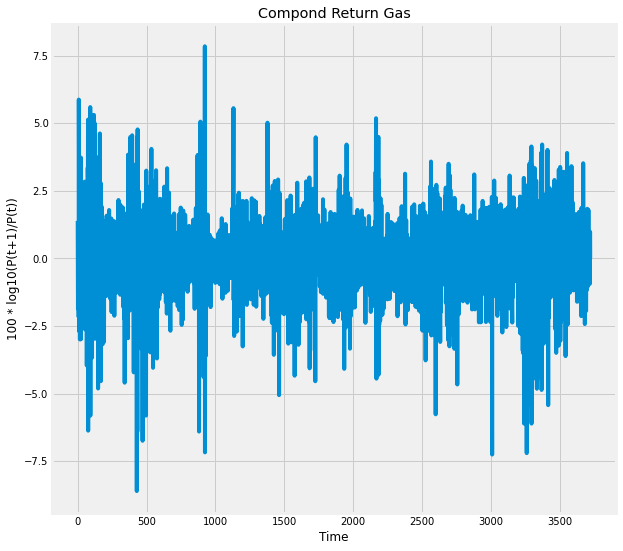

In [19]:
gas_return = compondReturn(last_price_day_gas)
plotUtils.plotFunction(gas_return, "Compond Return Gas", "Time", "100 * log10(P(t+1)/P(t))")

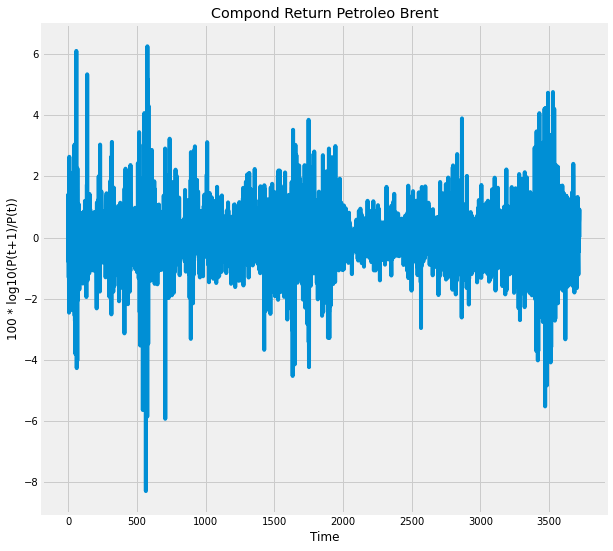

In [23]:
petroleo_brent_return = compondReturn(last_price_day_petroleo_brent)
petroleo_brent_return [-1] =0
plotUtils.plotFunction(petroleo_brent_return, "Compond Return Petroleo Brent", "Time", "100 * log10(P(t+1)/P(t))")

/var/folders/pr/mdnfvb3x5l3cn_qcjv5rxzqr0000gn/T/ipykernel_5392/3868305830.py:4: RuntimeWarning: invalid value encountered in log10
  array[i] = 100 * np.log10(dataFrame[i+1] / dataFrame[i])


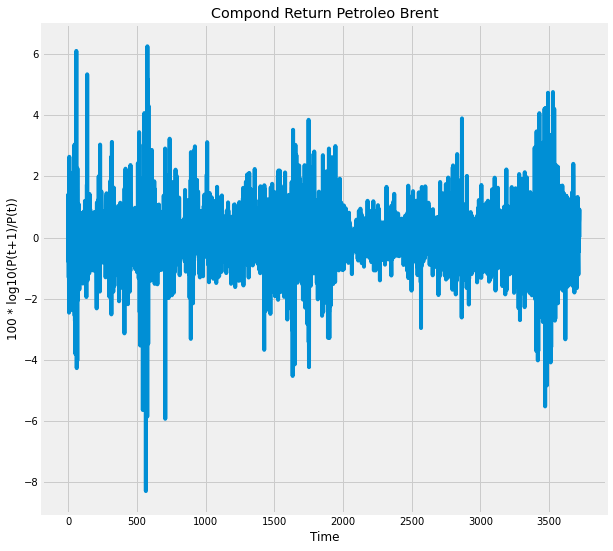

In [24]:
petroleo_wti_return = compondReturn(last_price_day_petroleo_wti)
plotUtils.plotFunction(petroleo_brent_return, "Compond Return Petroleo Brent", "Time", "100 * log10(P(t+1)/P(t))")

In [32]:
carbon_return = compondReturn(last_price_day_carbon)
plotUtils.plotFunction(petroleo_brent_return, "Compond Return Petroleo Brent", "Time", "100 * log10(P(t+1)/P(t))")

KeyError: 30

# Descriptive Statistic

## Frequency Distribution Histogram


In [ ]:
def frequencyDistribution(compondReturn):
    # Sturge's Rule
    # bins = 1 + 3.322 * np.log10(len(compondReturn))
    # values too littles
    
    fig, ax = plt.subplots(figsize=(9, 9))
    n, bins, patches = ax.hist(compondReturn, round(50))
    ax.set_title('Frequency Histogram', size = 19)
    plt.show()

    fig, ax = plt.subplots(nrows = 2, ncols = 1,figsize=(9, 9))
    ax[0].plot(bins[:len(n)], n)
    ax[1].plot(np.cumsum(n))
    ax[0].set_title('Empirical Cumulative', size = 19)
    ax[1].set_title('Cumulative Sum', size = 19)
    plt.show()

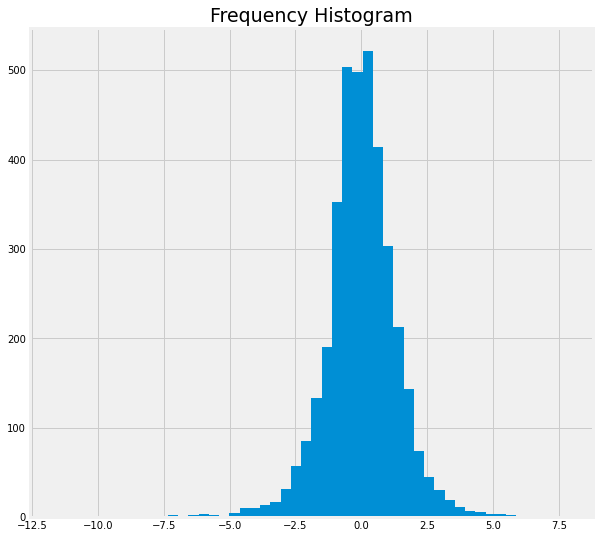

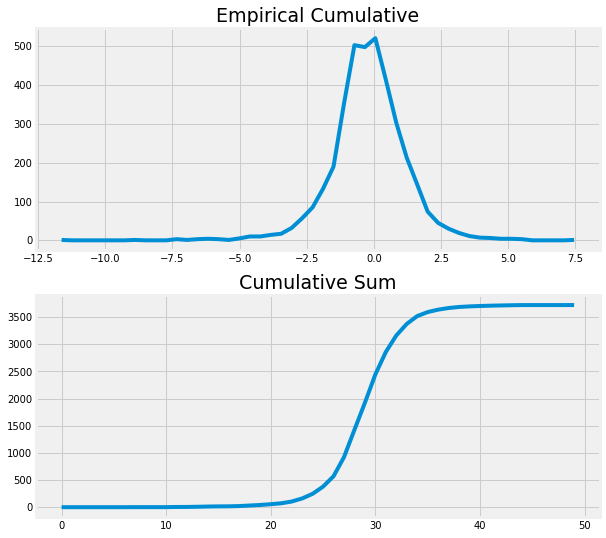

In [ ]:
frequencyDistribution(gas_return)

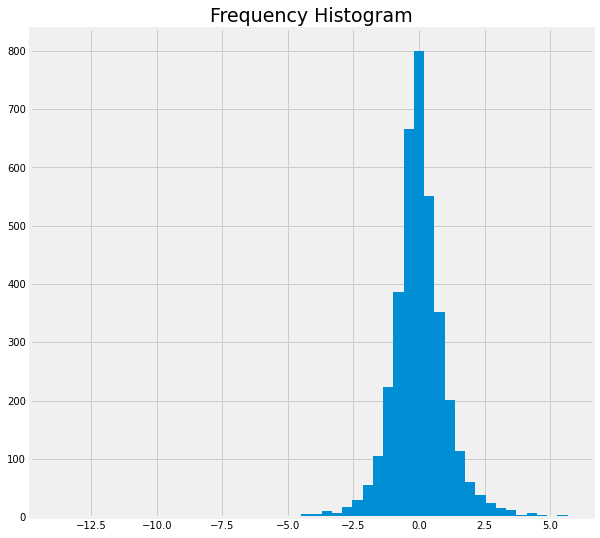

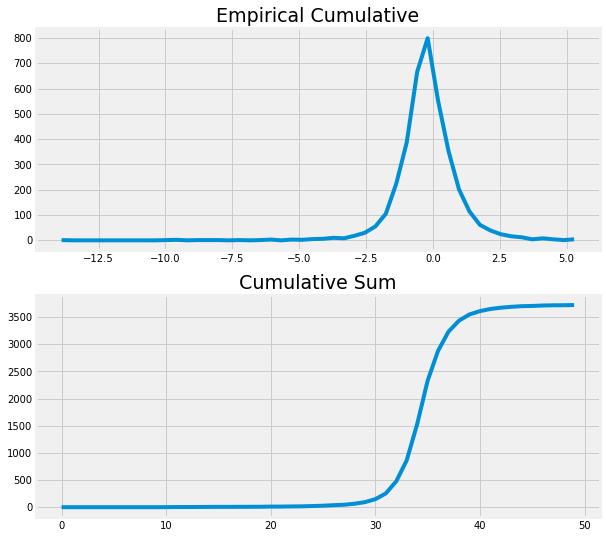

In [ ]:
frequencyDistribution(petroleo_wti_return)

## Basic Numeric Descriptives


### Mean


In [ ]:
def geometricMean(compondReturn):
    # Geometric name cannot be applied negative values
    return sp.stats.mstats.gmean(compondReturn + 20) - 20

In [ ]:
def arithmeticMean(compondReturn):
    return np.nanmean(compondReturn)

In [ ]:
arithmeticMean(gas_return)

-0.00037300812571952336

In [ ]:
geometricMean(gas_return)

-0.049767957493187964

In [ ]:
arithmeticMean(petroleo_brent_return)

-9.094068767620914e+274

### Standard Deviation

In [ ]:
def standarDeviation(compondReturn):
    return np.std(compondReturn)

In [ ]:
standarDeviation(gas_return)

1.3774822885763989

In [ ]:
standarDeviation(petroleo_brent_return)

/Users/cesarredondourdiales/Workdir/tfg/python-virtual-environments/env/lib/python3.8/site-packages/numpy/core/_methods.py:235: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


inf

### Max and min

In [ ]:
gas_return.max()

7.840977278083475

In [ ]:
gas_return.min()

-11.626578822586803

In [ ]:
petroleo_brent_return.max()

6.835408203727528e+198

In [ ]:
petroleo_brent_return.min()

-3.392087628967606e+278

## Swekness

For normally distributed data, the skewness should be about zero. For unimodal continuous distributions, a skewness value greater than zero means that there is more weight in the right tail of the distribution. The function skewtest can be used to determine if the skewness value is close enough to zero, statistically speaking. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html

In [ ]:
def skew(compondReturn):
    return stats.skew(compondReturn)

In [ ]:
skew(gas_return)

-0.2940957942535622

In [ ]:
skew(petroleo_brent_return)

-0.12183913478625194

## Q-Q Plot

## Jarque-Bera Test

## Box plots